Author: Ifrah Zeb

Email: ifrah_zeb@outlook.com

Date: 22/08/2021

## Introduction

I have set out to explore travel time to incidents by the New York City Fire department; what effects the travel time, and if and how we can improve it.

This notebook and the following notebook (EDA & Modelling) will go through the process of cleaning the dataframe (i.e. missing and duplicate values), gaining famiality with the dataset, identifying columns needed, feature engineering the dataset, modelling the chosen data, and evaluating the models.

- The target variable is `INCIDENT_TRAVEL_TM_SECONDS_QY`.

## 1. Loading Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
df= pd.read_csv('Data/Fire_Incident_Dispatch_Data.csv')

In [3]:
# Gain familiarity and check the first five rows after reading the data in 
df.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,5.001279e+14,01/01/2005 12:00:01 AM,RICHMOND / STATEN ISLAND,2785,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,121.0,51.0,502.0,...,01/01/2005 12:00:56 AM,01/01/2005 12:06:38 AM,01/01/2005 12:15:56 AM,N,Y,397,357,1,1,0
1,5.001331e+14,01/01/2005 12:00:03 AM,BRONX,3307,ARTHUR AVE & 183 ST,BRONX,10458.0,48.0,15.0,206.0,...,01/01/2005 12:01:51 AM,01/01/2005 12:04:23 AM,01/01/2005 12:07:03 AM,N,Y,260,250,1,0,0
2,5.001036e+14,01/01/2005 12:01:02 AM,BROOKLYN,363,TOMPKINS & PARK AVES,BROOKLYN,11206.0,79.0,36.0,303.0,...,01/01/2005 12:01:25 AM,01/01/2005 12:03:28 AM,01/01/2005 12:13:20 AM,N,Y,146,139,1,0,0
3,5.001752e+14,01/01/2005 12:01:42 AM,QUEENS,7515,ASTORIA BLVD AND 2ND ST,QUEENS,11102.0,114.0,22.0,401.0,...,01/01/2005 12:02:51 AM,01/01/2005 12:07:09 AM,01/01/2005 12:08:27 AM,N,Y,327,275,3,2,1
4,5.001716e+14,01/01/2005 12:01:45 AM,QUEENS,7162,JACKSON & 42 RD,QUEENS,11101.0,108.0,26.0,402.0,...,01/01/2005 12:04:12 AM,01/01/2005 12:08:16 AM,01/01/2005 12:24:37 AM,N,Y,391,279,1,1,1


In [4]:
# How much data are we working with here? using .shape()
print(df.shape)

(8538438, 29)


In [5]:
# State how many rows and columns there are
print(f'My dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

My dataframe has 8538438 rows and 29 columns.


## 2. Check datatypes and formats
First we will investigate the structure and format of the data to make sure that nothing is amiss.

In [6]:
df.head(3)

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,5.001279e+14,01/01/2005 12:00:01 AM,RICHMOND / STATEN ISLAND,2785,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,121.0,51.0,502.0,...,01/01/2005 12:00:56 AM,01/01/2005 12:06:38 AM,01/01/2005 12:15:56 AM,N,Y,397,357,1,1,0
1,5.001331e+14,01/01/2005 12:00:03 AM,BRONX,3307,ARTHUR AVE & 183 ST,BRONX,10458.0,48.0,15.0,206.0,...,01/01/2005 12:01:51 AM,01/01/2005 12:04:23 AM,01/01/2005 12:07:03 AM,N,Y,260,250,1,0,0
2,5.001036e+14,01/01/2005 12:01:02 AM,BROOKLYN,363,TOMPKINS & PARK AVES,BROOKLYN,11206.0,79.0,36.0,303.0,...,01/01/2005 12:01:25 AM,01/01/2005 12:03:28 AM,01/01/2005 12:13:20 AM,N,Y,146,139,1,0,0


In [7]:
# Gain an overview of the variables in the dataset with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538438 entries, 0 to 8538437
Data columns (total 29 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   STARFIRE_INCIDENT_ID            float64
 1   INCIDENT_DATETIME               object 
 2   ALARM_BOX_BOROUGH               object 
 3   ALARM_BOX_NUMBER                int64  
 4   ALARM_BOX_LOCATION              object 
 5   INCIDENT_BOROUGH                object 
 6   ZIPCODE                         float64
 7   POLICEPRECINCT                  float64
 8   CITYCOUNCILDISTRICT             float64
 9   COMMUNITYDISTRICT               float64
 10  COMMUNITYSCHOOLDISTRICT         float64
 11  CONGRESSIONALDISTRICT           float64
 12  ALARM_SOURCE_DESCRIPTION_TX     object 
 13  ALARM_LEVEL_INDEX_DESCRIPTION   object 
 14  HIGHEST_ALARM_LEVEL             object 
 15  INCIDENT_CLASSIFICATION         object 
 16  INCIDENT_CLASSIFICATION_GROUP   object 
 17  DISPATCH_RESPONSE_SECONDS_Q

Next, I am going to create two dataframes; a categorical dataframe and a numeric dataframe, in order to get a better idea of how the data is constructed.

In [8]:
# View just the categorical columns in a categorical df using select_dtypes('object')
categorical_df = df.select_dtypes('object').copy()
categorical_df.head()

,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC
0,01/01/2005 12:00:01 AM,RICHMOND / STATEN ISLAND,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,Phone,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,NonMedical Emergencies,01/01/2005 12:00:41 AM,01/01/2005 12:00:56 AM,01/01/2005 12:06:38 AM,01/01/2005 12:15:56 AM,N,Y
1,01/01/2005 12:00:03 AM,BRONX,ARTHUR AVE & 183 ST,BRONX,PD Link/Medical,DEFAULT RECORD,First Alarm,Medical MFA - PD Link,Medical MFAs,01/01/2005 12:00:13 AM,01/01/2005 12:01:51 AM,01/01/2005 12:04:23 AM,01/01/2005 12:07:03 AM,N,Y
2,01/01/2005 12:01:02 AM,BROOKLYN,TOMPKINS & PARK AVES,BROOKLYN,PD Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,01/01/2005 12:01:09 AM,01/01/2005 12:01:25 AM,01/01/2005 12:03:28 AM,01/01/2005 12:13:20 AM,N,Y
3,01/01/2005 12:01:42 AM,QUEENS,ASTORIA BLVD AND 2ND ST,QUEENS,Phone,DEFAULT RECORD,First Alarm,Non-Medical MFA - Phone,NonMedical MFAs,01/01/2005 12:02:34 AM,01/01/2005 12:02:51 AM,01/01/2005 12:07:09 AM,01/01/2005 12:08:27 AM,N,Y
4,01/01/2005 12:01:45 AM,QUEENS,JACKSON & 42 RD,QUEENS,Private Fire Alarm,Initial Alarm,First Alarm,Sprinkler System - Working on System,NonMedical Emergencies,01/01/2005 12:03:37 AM,01/01/2005 12:04:12 AM,01/01/2005 12:08:16 AM,01/01/2005 12:24:37 AM,N,Y


In [9]:
# Check shape of categorical df
categorical_df.shape

(8538438, 15)

The dataframe has 15 variables/columns that are categorical.

In [10]:
# Look at only the only the numeric columns and create df using .select_dtypes(['int64','float64'])
numeric_df = df.select_dtypes(['int64','float64']).copy()
# Check
numeric_df.head()

,STARFIRE_INCIDENT_ID,ALARM_BOX_NUMBER,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,5.001279e+14,2785,10314.0,121.0,51.0,502.0,31.0,11.0,40,397,357,1,1,0
1,5.001331e+14,3307,10458.0,48.0,15.0,206.0,10.0,15.0,10,260,250,1,0,0
2,5.001036e+14,363,11206.0,79.0,36.0,303.0,14.0,8.0,7,146,139,1,0,0
3,5.001752e+14,7515,11102.0,114.0,22.0,401.0,30.0,12.0,52,327,275,3,2,1
4,5.001716e+14,7162,11101.0,108.0,26.0,402.0,30.0,12.0,112,391,279,1,1,1


In [11]:
# Check shape of numerical df
numeric_df.shape

(8538438, 14)

The dataframe has 14 variables/ columns that are numeric.

However, the `INCIDENT_DATETIME` , `FIRST_ASSIGNMENT_DATETIME` , `FIRST_ACTIVATION_DATETIME`, `FIRST_ON_SCENE_DATETIME`,  and  `INCIDENT_CLOSE_DATETIME` are all objects but should be date time data types. I will now convert these to date time type.

In [12]:
# Create a copy of the dataframe before changing data types in columns
df2 = df.copy()

In [13]:
# Starting with one variable 'INCIDENT_DATETIME' change from object to datetime using .astype('datetime64[ns]')
df2['INCIDENT_DATETIME'] =  pd.to_datetime(df2['INCIDENT_DATETIME'].astype('datetime64[ns]'))

In [14]:
# Check that the type has changed to datetime with .info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538438 entries, 0 to 8538437
Data columns (total 29 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   STARFIRE_INCIDENT_ID            float64       
 1   INCIDENT_DATETIME               datetime64[ns]
 2   ALARM_BOX_BOROUGH               object        
 3   ALARM_BOX_NUMBER                int64         
 4   ALARM_BOX_LOCATION              object        
 5   INCIDENT_BOROUGH                object        
 6   ZIPCODE                         float64       
 7   POLICEPRECINCT                  float64       
 8   CITYCOUNCILDISTRICT             float64       
 9   COMMUNITYDISTRICT               float64       
 10  COMMUNITYSCHOOLDISTRICT         float64       
 11  CONGRESSIONALDISTRICT           float64       
 12  ALARM_SOURCE_DESCRIPTION_TX     object        
 13  ALARM_LEVEL_INDEX_DESCRIPTION   object        
 14  HIGHEST_ALARM_LEVEL             object        
 15

In [15]:
# After having confirmed it has worked I will convert the remaining columns to datetime
df2['FIRST_ASSIGNMENT_DATETIME'] =  pd.to_datetime(df2['FIRST_ASSIGNMENT_DATETIME'].astype('datetime64[ns]'))
df2['FIRST_ACTIVATION_DATETIME'] =  pd.to_datetime(df2['FIRST_ACTIVATION_DATETIME'].astype('datetime64[ns]'))
df2['FIRST_ON_SCENE_DATETIME'] =  pd.to_datetime(df2['FIRST_ON_SCENE_DATETIME'].astype('datetime64[ns]'))
df2['INCIDENT_CLOSE_DATETIME'] =  pd.to_datetime(df2['INCIDENT_CLOSE_DATETIME'].astype('datetime64[ns]'))

In [16]:
# Check the remaining columns have been converted to datetime
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8538438 entries, 0 to 8538437
Data columns (total 29 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   STARFIRE_INCIDENT_ID            float64       
 1   INCIDENT_DATETIME               datetime64[ns]
 2   ALARM_BOX_BOROUGH               object        
 3   ALARM_BOX_NUMBER                int64         
 4   ALARM_BOX_LOCATION              object        
 5   INCIDENT_BOROUGH                object        
 6   ZIPCODE                         float64       
 7   POLICEPRECINCT                  float64       
 8   CITYCOUNCILDISTRICT             float64       
 9   COMMUNITYDISTRICT               float64       
 10  COMMUNITYSCHOOLDISTRICT         float64       
 11  CONGRESSIONALDISTRICT           float64       
 12  ALARM_SOURCE_DESCRIPTION_TX     object        
 13  ALARM_LEVEL_INDEX_DESCRIPTION   object        
 14  HIGHEST_ALARM_LEVEL             object        
 15

Looking at the above they have all been successfully converted to date time variables.

## 3. Examining Location

   The variable is location is very important as it will inform us about travel time from different locations. The data presents us with a great number of columns that can represent location.

   Looking at the dataframe we can see that there is information about the alarm box over three columns `Alarm_box_borough`(categorical), `Alarm_box_number` (numeric data), and `Alarm_box_location` (categorical). The last of these columns provides street address, which none of the other kinds of location inform us of. It is the most granular, therefore I shall keep it but drop the other two as the borough is already provided in another column and the alarm box number is not relevant to my report.

   Moreover, there are 7 columns that describe location in varying ways: `Incident Borough`, `Zipcode`, `Police precinct`, `City council district`, `Community District`, `Community School District`, and `Congressional District`. I am choosing to keep the column `Incident Borough` as it is the only categorical column that provides the name of the borough in words rather than numbers. The remaining columns are related to interests such as school, community, congressional district, city council, and police- all represented in numeric format. The only exception in numeric format is `Zipcode`. I will keep this column as it pinpoints the exact location in a borough that an incident occurred.
   
   I would also like to add that, by removing these columns, the chances of multicolinearity occuring are lower (since they are closely related) and run time will be faster.

In [17]:
# First drop alarm box columns
df2.drop(columns=['ALARM_BOX_BOROUGH', 'ALARM_BOX_NUMBER'] ,inplace=True)

In [18]:
# Check the two alarm box columns have been dropped
df2.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,5.001279e+14,2005-01-01 00:00:01,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,121.0,51.0,502.0,31.0,11.0,...,2005-01-01 00:00:56,2005-01-01 00:06:38,2005-01-01 00:15:56,N,Y,397,357,1,1,0
1,5.001331e+14,2005-01-01 00:00:03,ARTHUR AVE & 183 ST,BRONX,10458.0,48.0,15.0,206.0,10.0,15.0,...,2005-01-01 00:01:51,2005-01-01 00:04:23,2005-01-01 00:07:03,N,Y,260,250,1,0,0
2,5.001036e+14,2005-01-01 00:01:02,TOMPKINS & PARK AVES,BROOKLYN,11206.0,79.0,36.0,303.0,14.0,8.0,...,2005-01-01 00:01:25,2005-01-01 00:03:28,2005-01-01 00:13:20,N,Y,146,139,1,0,0
3,5.001752e+14,2005-01-01 00:01:42,ASTORIA BLVD AND 2ND ST,QUEENS,11102.0,114.0,22.0,401.0,30.0,12.0,...,2005-01-01 00:02:51,2005-01-01 00:07:09,2005-01-01 00:08:27,N,Y,327,275,3,2,1
4,5.001716e+14,2005-01-01 00:01:45,JACKSON & 42 RD,QUEENS,11101.0,108.0,26.0,402.0,30.0,12.0,...,2005-01-01 00:04:12,2005-01-01 00:08:16,2005-01-01 00:24:37,N,Y,391,279,1,1,1


In [19]:
# Next drop the 5 numerical location columns

df2.drop(columns=['POLICEPRECINCT', 'CITYCOUNCILDISTRICT', 
                  'COMMUNITYDISTRICT', 'COMMUNITYSCHOOLDISTRICT', 'CONGRESSIONALDISTRICT' ] ,inplace=True)

In [20]:
# Check the df has removed the numerical location columns 
df2.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,5.001279e+14,2005-01-01 00:00:01,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,Phone,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,NonMedical Emergencies,...,2005-01-01 00:00:56,2005-01-01 00:06:38,2005-01-01 00:15:56,N,Y,397,357,1,1,0
1,5.001331e+14,2005-01-01 00:00:03,ARTHUR AVE & 183 ST,BRONX,10458.0,PD Link/Medical,DEFAULT RECORD,First Alarm,Medical MFA - PD Link,Medical MFAs,...,2005-01-01 00:01:51,2005-01-01 00:04:23,2005-01-01 00:07:03,N,Y,260,250,1,0,0
2,5.001036e+14,2005-01-01 00:01:02,TOMPKINS & PARK AVES,BROOKLYN,11206.0,PD Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,...,2005-01-01 00:01:25,2005-01-01 00:03:28,2005-01-01 00:13:20,N,Y,146,139,1,0,0
3,5.001752e+14,2005-01-01 00:01:42,ASTORIA BLVD AND 2ND ST,QUEENS,11102.0,Phone,DEFAULT RECORD,First Alarm,Non-Medical MFA - Phone,NonMedical MFAs,...,2005-01-01 00:02:51,2005-01-01 00:07:09,2005-01-01 00:08:27,N,Y,327,275,3,2,1
4,5.001716e+14,2005-01-01 00:01:45,JACKSON & 42 RD,QUEENS,11101.0,Private Fire Alarm,Initial Alarm,First Alarm,Sprinkler System - Working on System,NonMedical Emergencies,...,2005-01-01 00:04:12,2005-01-01 00:08:16,2005-01-01 00:24:37,N,Y,391,279,1,1,1


In [21]:
# State how many rows and columns there are now
print(f'My dataframe now has {df2.shape[0]} rows and {df2.shape[1]} columns.')

My dataframe now has 8538438 rows and 22 columns.


## 4. Checking for duplicate data
Now that I have gained familiarity and examined the variables, I will check for duplicate data. First, on the row level.

In [22]:
# Checking for duplicates and counting
df2.duplicated().sum()

15

There are 15 duplicates in the dataset. Below I am going to check how much of the dataset it represents.

In [23]:
# See what percentage of the data the amount represents by divinding the duplicates with shape of the dataset
df2.duplicated().sum()/df2.shape[0]*100.0

0.00017567615997211668

We have a very small percentage, (approx 0.0002%). It would signify that some people in the exact same area had the same accident at the same time. I think in such a large dataset it is not beyond reason however slight the chance, thus I am going to leave these rows in the dataset.

In [24]:
# Does not load as it is too computationally expensive, 
# I will have to double check once I have taken a sample of the data later
#df2.T.duplicated()

## 5. Dealing with missing data

In [25]:
# Checking the shape of the dataframe before diving into the missing data
df2.shape

(8538438, 22)

In [26]:
# Check how many values are missing with isna().sum() function
df2.isna().sum()

STARFIRE_INCIDENT_ID                   20
INCIDENT_DATETIME                       0
ALARM_BOX_LOCATION                    213
INCIDENT_BOROUGH                        0
ZIPCODE                            510871
ALARM_SOURCE_DESCRIPTION_TX             0
ALARM_LEVEL_INDEX_DESCRIPTION           0
HIGHEST_ALARM_LEVEL                     0
INCIDENT_CLASSIFICATION                 0
INCIDENT_CLASSIFICATION_GROUP           0
DISPATCH_RESPONSE_SECONDS_QY            0
FIRST_ASSIGNMENT_DATETIME           46512
FIRST_ACTIVATION_DATETIME           70327
FIRST_ON_SCENE_DATETIME           1186861
INCIDENT_CLOSE_DATETIME                 0
VALID_DISPATCH_RSPNS_TIME_INDC          0
VALID_INCIDENT_RSPNS_TIME_INDC          0
INCIDENT_RESPONSE_SECONDS_QY            0
INCIDENT_TRAVEL_TM_SECONDS_QY           0
ENGINES_ASSIGNED_QUANTITY               0
LADDERS_ASSIGNED_QUANTITY               0
OTHER_UNITS_ASSIGNED_QUANTITY           0
dtype: int64

In [27]:
# Create a copy of the dataframe now that I know I will be dealing with missing values
df3 = df2.copy()

In [28]:
# Percentage of missing values in each column
df3.isna().sum()/df3.shape[0]*100.0

STARFIRE_INCIDENT_ID               0.000234
INCIDENT_DATETIME                  0.000000
ALARM_BOX_LOCATION                 0.002495
INCIDENT_BOROUGH                   0.000000
ZIPCODE                            5.983190
ALARM_SOURCE_DESCRIPTION_TX        0.000000
ALARM_LEVEL_INDEX_DESCRIPTION      0.000000
HIGHEST_ALARM_LEVEL                0.000000
INCIDENT_CLASSIFICATION            0.000000
INCIDENT_CLASSIFICATION_GROUP      0.000000
DISPATCH_RESPONSE_SECONDS_QY       0.000000
FIRST_ASSIGNMENT_DATETIME          0.544737
FIRST_ACTIVATION_DATETIME          0.823652
FIRST_ON_SCENE_DATETIME           13.900212
INCIDENT_CLOSE_DATETIME            0.000000
VALID_DISPATCH_RSPNS_TIME_INDC     0.000000
VALID_INCIDENT_RSPNS_TIME_INDC     0.000000
INCIDENT_RESPONSE_SECONDS_QY       0.000000
INCIDENT_TRAVEL_TM_SECONDS_QY      0.000000
ENGINES_ASSIGNED_QUANTITY          0.000000
LADDERS_ASSIGNED_QUANTITY          0.000000
OTHER_UNITS_ASSIGNED_QUANTITY      0.000000
dtype: float64

   Looking at the above we can see that ~14% of data is missing from the column `First on Scene Datetime`. This is a large amount of the data that cannot be dismissed.
   
   Next, ~6% of values are missing from the `Zipcode` column. This is a large enough proportion that I cannot remove the rows, so will need to be filled.
    
   Also, we are missing a very small amount (20 rows/ 0.0002%) of `Starfire Incident ID`. It is important right now that each piece of information has an ID. Therefore, I will remove the null values from this column- it is such a small number that it would be inconsequential.
    
   Similarly, the column `First Assignment Datetime` is missing ~0.5%, `First Activation Datetime` is missing -0.8%, and `ALARM_BOX_LOCATION` is missing ~0.002%. These columns have a low enough percentage that we can remove the null values from these columns also.

In [29]:
# First drop null values in starfire_incident_ID column using dropna
df3.dropna(subset = ['STARFIRE_INCIDENT_ID'], inplace=True)

In [30]:
# Drop remaining na's for `First Assignment Datetime`, `First Activation Datetime`, and 'ALARM_BOX_LOCATION'
df3.dropna(subset = (['FIRST_ASSIGNMENT_DATETIME', 'FIRST_ACTIVATION_DATETIME', 'ALARM_BOX_LOCATION']), inplace=True)

In [31]:
# Check they have been dropped by displaying the na percentages per column 
df3.isna().sum()/df.shape[0]*100.0

STARFIRE_INCIDENT_ID               0.000000
INCIDENT_DATETIME                  0.000000
ALARM_BOX_LOCATION                 0.000000
INCIDENT_BOROUGH                   0.000000
ZIPCODE                            5.827986
ALARM_SOURCE_DESCRIPTION_TX        0.000000
ALARM_LEVEL_INDEX_DESCRIPTION      0.000000
HIGHEST_ALARM_LEVEL                0.000000
INCIDENT_CLASSIFICATION            0.000000
INCIDENT_CLASSIFICATION_GROUP      0.000000
DISPATCH_RESPONSE_SECONDS_QY       0.000000
FIRST_ASSIGNMENT_DATETIME          0.000000
FIRST_ACTIVATION_DATETIME          0.000000
FIRST_ON_SCENE_DATETIME           13.206315
INCIDENT_CLOSE_DATETIME            0.000000
VALID_DISPATCH_RSPNS_TIME_INDC     0.000000
VALID_INCIDENT_RSPNS_TIME_INDC     0.000000
INCIDENT_RESPONSE_SECONDS_QY       0.000000
INCIDENT_TRAVEL_TM_SECONDS_QY      0.000000
ENGINES_ASSIGNED_QUANTITY          0.000000
LADDERS_ASSIGNED_QUANTITY          0.000000
OTHER_UNITS_ASSIGNED_QUANTITY      0.000000
dtype: float64

We are now left with null values in columns `FIRST_ON_SCENE_DATETIME` and `ZIPCODE`.

A nan value for `FIRST_ON_SCENE_DATETIME` suggests that no travel was made. Thus, I am going to examine the column `INCIDENT_TRAVEL_TM_SECONDS_QY` when no travel was made.

## 6. Examine the zero travel rows

In [32]:
# check how many boroughs there are with unique ()
df3['INCIDENT_BOROUGH'].unique()

array(['RICHMOND / STATEN ISLAND', 'BRONX', 'BROOKLYN', 'QUEENS',
       'MANHATTAN'], dtype=object)

In [33]:
# check the amount of 0 second incidents with .value_counts()
df3['INCIDENT_TRAVEL_TM_SECONDS_QY'].value_counts()

0       1127669
218       37290
219       37177
228       36916
229       36846
         ...   
3819          1
9640          1
4403          1
3473          1
3458          1
Name: INCIDENT_TRAVEL_TM_SECONDS_QY, Length: 4005, dtype: int64

In [34]:
# check the percentage of 0 second incidents compared to the rest of the dataframe
print(1127669/df3.shape[0]*100)

13.317023064579594


There is almost ~14% of the data that is 0 seconds travel which is slightly more (0.7%) than what is missing in the `FIRST_ON_SCENE_DATETIME` column.

In [35]:
# check the alarm types
df3['HIGHEST_ALARM_LEVEL'].value_counts()

First Alarm              8402103
All Hands Working          38124
Seventh Alarm              24172
Second Alarm                2518
Third Alarm                  525
Fourth Alarm                 171
Fifth Alarm or Higher        115
Fifth Alarm                   86
Complaint/Still               53
Sixth Alarm                    4
Simultaneous Call              4
Eighth Alarm                   1
Name: HIGHEST_ALARM_LEVEL, dtype: int64

I am going to create a dataframe for *no travel* using columns `STARFIRE_INCIDENT_ID`, `INCIDENT_TRAVEL_TM_SECONDS_QY`, `HIGHEST_ALARM_LEVEL`, `ALARM_BOX_LOCATION`, `INCIDENT_BOROUGH` and `ZIPCODE`.

In [36]:
#create dataframe
no_travel = pd.DataFrame(df3,columns=['STARFIRE_INCIDENT_ID', 'INCIDENT_TRAVEL_TM_SECONDS_QY', 'HIGHEST_ALARM_LEVEL', 'ALARM_BOX_LOCATION', \
                                      'INCIDENT_BOROUGH', 'ZIPCODE'])
# print no_travel dataframe with .head()
no_travel.head()

,STARFIRE_INCIDENT_ID,INCIDENT_TRAVEL_TM_SECONDS_QY,HIGHEST_ALARM_LEVEL,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE
0,5.001279e+14,357,First Alarm,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0
1,5.001331e+14,250,First Alarm,ARTHUR AVE & 183 ST,BRONX,10458.0
2,5.001036e+14,139,First Alarm,TOMPKINS & PARK AVES,BROOKLYN,11206.0
3,5.001752e+14,275,First Alarm,ASTORIA BLVD AND 2ND ST,QUEENS,11102.0
4,5.001716e+14,279,First Alarm,JACKSON & 42 RD,QUEENS,11101.0


In [37]:
# filter the dataframe to 0 seconds travelled for the 'INCIDENT_TRAVEL_TM_SECONDS_QY' column
zero_travel = no_travel[no_travel["INCIDENT_TRAVEL_TM_SECONDS_QY"] <= 0]
zero_travel

,STARFIRE_INCIDENT_ID,INCIDENT_TRAVEL_TM_SECONDS_QY,HIGHEST_ALARM_LEVEL,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE
11,5.001042e+14,0,First Alarm,"ON HOUSTON ST, 150 FT EAST OF AVE D",MANHATTAN,10009.0
16,5.001148e+14,0,First Alarm,10 AVE & 48 ST,BROOKLYN,11219.0
53,5.001280e+14,0,First Alarm,145 RD & SPRINGFIELD BLVD,QUEENS,NaN
57,5.001312e+14,0,First Alarm,QUEENS BLVD OPP. JACOBUS ST,QUEENS,11373.0
67,5.001132e+14,0,First Alarm,3 AVE & CARROLL ST,BROOKLYN,11215.0
...,...,...,...,...,...,...
8538417,2.112530e+15,0,First Alarm,OCEAN AVE & AVENUE J,BROOKLYN,11230.0
8538421,2.112520e+15,0,First Alarm,ATLANTIC AVE & EASTERN PWAY,BROOKLYN,11233.0
8538423,2.112520e+15,0,First Alarm,FORT WASHINGTON AVE & 172 ST,MANHATTAN,NaN
8538428,2.112510e+15,0,First Alarm,NEW HAVEN AVE & BEACH 13 ST,QUEENS,11691.0


In [38]:
# Check the unique amount of secounds in the dataframe is only 0 using unique()
zero_travel["INCIDENT_TRAVEL_TM_SECONDS_QY"].unique()

array([0])

Above, I have confirmed that the zero_travel dataframe is indeed only showing '0' seconds.

In [39]:
# using the dataframe create a new dataframe that groups 0 travel by Borough
borough_zero_travel = zero_travel.groupby(['INCIDENT_BOROUGH']).count()
borough_zero_travel / borough_zero_travel.groupby(level=0).count()

,STARFIRE_INCIDENT_ID,INCIDENT_TRAVEL_TM_SECONDS_QY,HIGHEST_ALARM_LEVEL,ALARM_BOX_LOCATION,ZIPCODE
INCIDENT_BOROUGH,,,,,
BRONX,237352.0,237352.0,237352.0,237352.0,226747.0
BROOKLYN,263311.0,263311.0,263311.0,263311.0,250957.0
MANHATTAN,382224.0,382224.0,382224.0,382224.0,365795.0
QUEENS,198739.0,198739.0,198739.0,198739.0,181237.0
RICHMOND / STATEN ISLAND,46043.0,46043.0,46043.0,46043.0,42501.0


In [40]:
# using value_counts() on the 'HIGHEST_ALARM_LEVEL' to show the different kinds of alarm for the 0 seconds
zero_travel["HIGHEST_ALARM_LEVEL"].value_counts()

First Alarm          1127613
Complaint/Still           34
Second Alarm               9
All Hands Working          7
Seventh Alarm              5
Third Alarm                1
Name: HIGHEST_ALARM_LEVEL, dtype: int64

In [41]:
# look at the percentage of each type of alarm
zero_travel["HIGHEST_ALARM_LEVEL"].value_counts(normalize=True)

First Alarm          9.999503e-01
Complaint/Still      3.015069e-05
Second Alarm         7.981065e-06
All Hands Working    6.207495e-06
Seventh Alarm        4.433925e-06
Third Alarm          8.867850e-07
Name: HIGHEST_ALARM_LEVEL, dtype: float64

In [42]:
# check the percentage of zero travel by borough
zero_travel["INCIDENT_BOROUGH"].value_counts(normalize=True)

MANHATTAN                   0.338951
BROOKLYN                    0.233500
BRONX                       0.210480
QUEENS                      0.176239
RICHMOND / STATEN ISLAND    0.040830
Name: INCIDENT_BOROUGH, dtype: float64

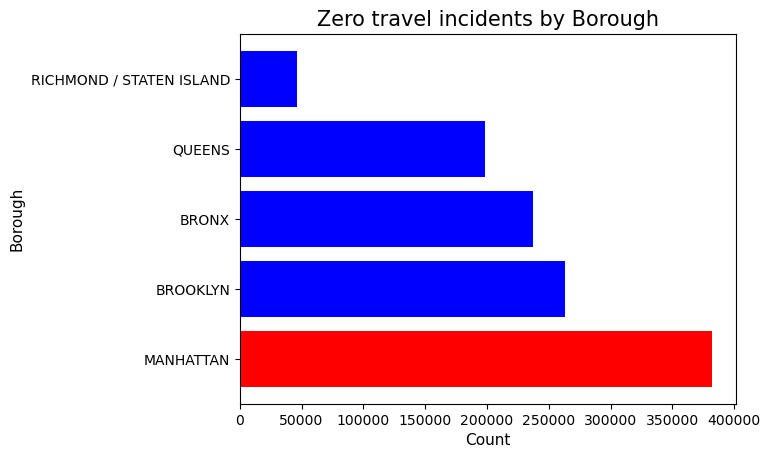

In [81]:
# plot the count of 0 seconds for each borough in a bar plot
plt.figure()
plt.barh(zero_travel["INCIDENT_BOROUGH"].value_counts().index, 
        zero_travel["INCIDENT_BOROUGH"].value_counts().values,
        color = ['r','b','b','b','b','b'])
plt.xlabel('Count', fontsize=11)
plt.ylabel('Borough', fontsize=11)
plt.title('Zero travel incidents by borough', fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

Using the value_counts(), the percentages of each borough also shown above, and the bar chart below we can see that the vast majority of Zero travel incidents (almost 99%) are of the 'First Alarm' type. Having looked at the different alarm level descriptions in the data description provided we can see that the 'First Alarm' is not a serious incident, without further information we will have to assume that these instances of zero travel and 'First Alarm' were either false alarms or in need of a different service i.e. ambulance service. 

The remaining type of alarms suggest either an error when inputting, or they were redirected to another fire service. We cannot know for sure, but this is the assumption I am making.

As our premise is to look at travel between the service and incidents, these rows are of no value to us. However, given time we could look at this further and examine where most of these calls occur from and if they occur more at certain points in the year.

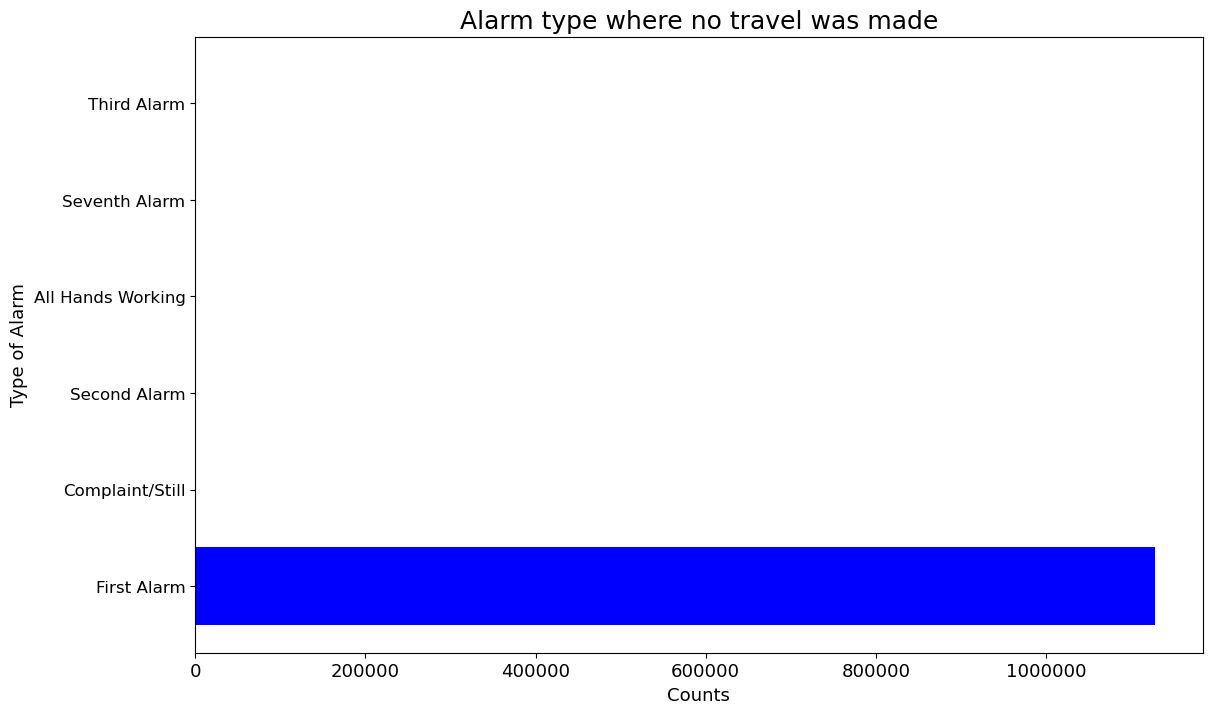

In [85]:
# visualise the above in a bar chart
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(13,8))
plt.barh(zero_travel["HIGHEST_ALARM_LEVEL"].value_counts().index, 
        zero_travel["HIGHEST_ALARM_LEVEL"].value_counts().values,
        color = ['b','r','b','b','b','b'])
plt.xlabel('Counts', fontsize=13)
plt.ylabel('Type of Alarm', fontsize=13)
plt.title('Alarm type where no travel was made', fontsize= 18)
plt.xticks(rotation='horizontal', fontsize=13)
plt.yticks(fontsize=12)
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.show()

Having looked in detail, I am deeming this data as irrelevant to my purpose and will remove it from the dataframe.

In [45]:
df3.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,5.001279e+14,2005-01-01 00:00:01,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,Phone,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,NonMedical Emergencies,...,2005-01-01 00:00:56,2005-01-01 00:06:38,2005-01-01 00:15:56,N,Y,397,357,1,1,0
1,5.001331e+14,2005-01-01 00:00:03,ARTHUR AVE & 183 ST,BRONX,10458.0,PD Link/Medical,DEFAULT RECORD,First Alarm,Medical MFA - PD Link,Medical MFAs,...,2005-01-01 00:01:51,2005-01-01 00:04:23,2005-01-01 00:07:03,N,Y,260,250,1,0,0
2,5.001036e+14,2005-01-01 00:01:02,TOMPKINS & PARK AVES,BROOKLYN,11206.0,PD Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,...,2005-01-01 00:01:25,2005-01-01 00:03:28,2005-01-01 00:13:20,N,Y,146,139,1,0,0
3,5.001752e+14,2005-01-01 00:01:42,ASTORIA BLVD AND 2ND ST,QUEENS,11102.0,Phone,DEFAULT RECORD,First Alarm,Non-Medical MFA - Phone,NonMedical MFAs,...,2005-01-01 00:02:51,2005-01-01 00:07:09,2005-01-01 00:08:27,N,Y,327,275,3,2,1
4,5.001716e+14,2005-01-01 00:01:45,JACKSON & 42 RD,QUEENS,11101.0,Private Fire Alarm,Initial Alarm,First Alarm,Sprinkler System - Working on System,NonMedical Emergencies,...,2005-01-01 00:04:12,2005-01-01 00:08:16,2005-01-01 00:24:37,N,Y,391,279,1,1,1


In [46]:
# drop 0 seconds from 'INCIDENT_TRAVEL_TM_SECONDS_QY'
df3.drop(df3[df3['INCIDENT_TRAVEL_TM_SECONDS_QY'] <= 0].index, inplace= True)

In [47]:
df2.shape

(8538438, 22)

In [48]:
df3.shape

(7340207, 22)

In [49]:
# check the minimum seconds in 'INCIDENT_TRAVEL_TM_SECONDS_QY' is not 0. It is not
df3['INCIDENT_TRAVEL_TM_SECONDS_QY'].min()

1

In [50]:
# Sanity check for 0 seconds in 'INCIDENT_TRAVEL_TM_SECONDS_QY' column
for value in df3['INCIDENT_TRAVEL_TM_SECONDS_QY']:
    if value == 0:
        print(value)

In [51]:
# Print all values in 'INCIDENT_TRAVEL_TM_SECONDS_QY' with unique() function as final check
a = df3['INCIDENT_TRAVEL_TM_SECONDS_QY'].unique()
print(sorted(a))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [52]:
# check null values in the dataframe by percentage
df3.isna().sum()/df.shape[0]*100.0

STARFIRE_INCIDENT_ID              0.000000
INCIDENT_DATETIME                 0.000000
ALARM_BOX_LOCATION                0.000000
INCIDENT_BOROUGH                  0.000000
ZIPCODE                           5.120222
ALARM_SOURCE_DESCRIPTION_TX       0.000000
ALARM_LEVEL_INDEX_DESCRIPTION     0.000000
HIGHEST_ALARM_LEVEL               0.000000
INCIDENT_CLASSIFICATION           0.000000
INCIDENT_CLASSIFICATION_GROUP     0.000000
DISPATCH_RESPONSE_SECONDS_QY      0.000000
FIRST_ASSIGNMENT_DATETIME         0.000000
FIRST_ACTIVATION_DATETIME         0.000000
FIRST_ON_SCENE_DATETIME           0.000000
INCIDENT_CLOSE_DATETIME           0.000000
VALID_DISPATCH_RSPNS_TIME_INDC    0.000000
VALID_INCIDENT_RSPNS_TIME_INDC    0.000000
INCIDENT_RESPONSE_SECONDS_QY      0.000000
INCIDENT_TRAVEL_TM_SECONDS_QY     0.000000
ENGINES_ASSIGNED_QUANTITY         0.000000
LADDERS_ASSIGNED_QUANTITY         0.000000
OTHER_UNITS_ASSIGNED_QUANTITY     0.000000
dtype: float64

After dropping the 0 second incidents from `INCIDENT_TRAVEL_TM_SECONDS_QY` it has cleared the null values that were previously present for `FIRST_ON_SCENE_DATETIME`, thus confirming my confirmation that incidents were recorded but no action i.e. travel was made thus no arrival to any scene.

Finally I am left with null values in the `ZIPCODE` column.

## 7. Zip code null values

In [53]:
# display the remaining null value rows in na_values dataframe
na_values = df3[df3.isna().any(axis=1)]
#print head of the dataframe
na_values.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
14,5.001812e+14,2005-01-01 00:09:42,PS87 80 ST-BTW 67 DR & 68 AV,QUEENS,NaN,Phone,DEFAULT RECORD,First Alarm,Non-Medical MFA - Phone,NonMedical MFAs,...,2005-01-01 00:11:31,2005-01-01 00:14:47,2005-01-01 00:17:58,N,Y,305,214,1,1,0
18,5.001008e+14,2005-01-01 00:12:27,BRIGHTON AVE & JERSEY ST,RICHMOND / STATEN ISLAND,NaN,Phone,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,...,2005-01-01 00:13:53,2005-01-01 00:15:38,2005-01-01 00:27:23,N,Y,191,118,1,0,0
36,5.001854e+14,2005-01-01 00:18:21,91 AVE & 84 ST,QUEENS,NaN,ERS No Contact,DEFAULT RECORD,First Alarm,Non-Medical MFA - ERS No Contact,NonMedical MFAs,...,2005-01-01 00:18:42,2005-01-01 00:20:56,2005-01-01 00:22:06,N,Y,155,147,1,0,0
43,5.001595e+14,2005-01-01 00:24:42,259 ST & 148 RD,QUEENS,NaN,ERS No Contact,DEFAULT RECORD,First Alarm,Non-Medical MFA - ERS No Contact,NonMedical MFAs,...,2005-01-01 00:25:18,2005-01-01 00:29:39,2005-01-01 00:30:52,N,Y,297,286,1,0,0
59,5.001439e+14,2005-01-01 00:36:09,WOODWARD AVE & STANHOPE ST,QUEENS,NaN,ERS No Contact,DEFAULT RECORD,First Alarm,Non-Medical MFA - ERS No Contact,NonMedical MFAs,...,2005-01-01 00:36:30,2005-01-01 00:39:59,2005-01-01 00:40:41,N,Y,230,225,1,0,0


In [54]:
# See how many per borough for the zipcode are missing
na_values['INCIDENT_BOROUGH'].value_counts()

QUEENS                      126812
MANHATTAN                   101855
BRONX                        93300
BROOKLYN                     81744
RICHMOND / STATEN ISLAND     33476
Name: INCIDENT_BOROUGH, dtype: int64

In [55]:
# Create grouped_borough variable, and then extract into a new variable mean_borough using .mean() function
grouped_borough = df3.groupby('INCIDENT_BOROUGH')
mean_borough = grouped_borough.mean()
# Reset index
mean_borough = mean_borough.reset_index()

In [56]:
# Print mean_borough variable
# A quick google map search of the mean zipcodes and the borough revealed that the mean zipcodes are correct
print(mean_borough)

           INCIDENT_BOROUGH  STARFIRE_INCIDENT_ID       ZIPCODE  \
0                     BRONX          1.303483e+15  10461.000515   
1                  BROOKLYN          1.294108e+15  11219.174032   
2                 MANHATTAN          1.290827e+15  10025.937449   
3                    QUEENS          1.293100e+15  11377.541611   
4  RICHMOND / STATEN ISLAND          1.286611e+15  10307.234984   

   DISPATCH_RESPONSE_SECONDS_QY  INCIDENT_RESPONSE_SECONDS_QY  \
0                     39.156958                    323.463346   
1                     32.878514                    275.811544   
2                     39.806777                    317.125425   
3                     38.574398                    321.050083   
4                     35.208177                    307.861904   

   INCIDENT_TRAVEL_TM_SECONDS_QY  ENGINES_ASSIGNED_QUANTITY  \
0                     284.306221                   1.319562   
1                     242.932865                   1.357566   
2                

In [57]:
# replace null values in zipcode borough Brooklyn with mean zipcode for Brooklyn with .loc function
df3.loc[(df3['INCIDENT_BOROUGH'] == 'BROOKLYN') & (df3['ZIPCODE'].isna()),  ['ZIPCODE']] = '11219.0'

In [58]:
# create brooklyn only dataframe with .loc function
brooklyn = df3.loc[df3['INCIDENT_BOROUGH'] == 'BROOKLYN']
#print the dataframe head
brooklyn.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
2,5.001036e+14,2005-01-01 00:01:02,TOMPKINS & PARK AVES,BROOKLYN,11206.0,PD Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,...,2005-01-01 00:01:25,2005-01-01 00:03:28,2005-01-01 00:13:20,N,Y,146,139,1,0,0
8,5.001266e+14,2005-01-01 00:03:35,4 AVE & 54 ST,BROOKLYN,11220.0,Phone,Initial Alarm,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,...,2005-01-01 00:04:31,2005-01-01 00:07:12,2005-01-01 00:23:43,N,Y,217,176,1,1,0
21,5.001024e+14,2005-01-01 00:13:09,UNION AVE & GRAND ST,BROOKLYN,11211.0,Phone,Initial Alarm,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,...,2005-01-01 00:14:14,2005-01-01 00:15:56,2005-01-01 00:19:13,N,Y,167,126,1,0,0
24,5.001090e+14,2005-01-01 00:14:23,IRVING AVE & ELDERT ST,BROOKLYN,11237.0,Phone,Initial Alarm,First Alarm,Assist Civilian - Non-Medical,NonMedical Emergencies,...,2005-01-01 00:18:53,2005-01-01 00:27:58,2005-01-01 00:31:06,N,Y,815,566,0,1,0
28,5.001339e+14,2005-01-01 00:16:05,SHELL RD 200' S OF AVE X W/S OF S,BROOKLYN,11223.0,Phone,Initial Alarm,First Alarm,Demolition Debris or Rubbish Fire,NonStructural Fires,...,2005-01-01 00:16:46,2005-01-01 00:20:04,2005-01-01 00:26:20,N,Y,239,213,1,0,0


In [59]:
# filter it to the former na values that now should be '11219.0'
brooklyn_na= brooklyn.loc[brooklyn['ZIPCODE']== '11219.0']
# print the filtered dataframe head
brooklyn_na.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
68,5.001073e+14,2005-01-01 00:40:43,KNICKERBOCKER AVE & TROUTMAN ST,BROOKLYN,11219.0,ERS No Contact,DEFAULT RECORD,First Alarm,Non-Medical MFA - ERS No Contact,NonMedical MFAs,...,2005-01-01 00:41:00,2005-01-01 00:44:23,2005-01-01 00:45:28,N,Y,220,216,1,0,0
77,5.001065e+14,2005-01-01 00:46:48,DEKALB AVE & TAAFFE PL,BROOKLYN,11219.0,ERS No Contact,Initial Alarm,First Alarm,Odor - Other Than Smoke,NonMedical Emergencies,...,2005-01-01 00:48:18,2005-01-01 00:50:18,2005-01-01 00:52:27,N,Y,210,157,1,0,0
83,5.001338e+14,2005-01-01 00:52:18,AVE Y & EAST 2 ST,BROOKLYN,11219.0,ERS No Contact,Initial Alarm,First Alarm,Vehicle Accident - Other,NonMedical Emergencies,...,2005-01-01 00:52:56,2005-01-01 00:57:11,2005-01-01 01:25:16,N,Y,293,274,1,1,0
98,5.001328e+14,2005-01-01 01:02:25,AVE Z & EAST 28 ST,BROOKLYN,11219.0,ERS No Contact,DEFAULT RECORD,First Alarm,Non-Medical MFA - ERS No Contact,NonMedical MFAs,...,2005-01-01 01:03:18,2005-01-01 01:09:35,2005-01-01 01:13:55,N,Y,430,392,1,0,0
110,5.001846e+14,2005-01-01 01:08:38,GOWANUS EXPY BET 65 ST & 92 ST,BROOKLYN,11219.0,Phone,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,...,2005-01-01 01:09:57,2005-01-01 01:12:57,2005-01-01 01:35:30,N,Y,259,194,2,2,1


In [60]:
# check the null values in the `ZIPCODE` column have decreased
df3.isna().sum()/df.shape[0]*100.0

STARFIRE_INCIDENT_ID              0.000000
INCIDENT_DATETIME                 0.000000
ALARM_BOX_LOCATION                0.000000
INCIDENT_BOROUGH                  0.000000
ZIPCODE                           4.162857
ALARM_SOURCE_DESCRIPTION_TX       0.000000
ALARM_LEVEL_INDEX_DESCRIPTION     0.000000
HIGHEST_ALARM_LEVEL               0.000000
INCIDENT_CLASSIFICATION           0.000000
INCIDENT_CLASSIFICATION_GROUP     0.000000
DISPATCH_RESPONSE_SECONDS_QY      0.000000
FIRST_ASSIGNMENT_DATETIME         0.000000
FIRST_ACTIVATION_DATETIME         0.000000
FIRST_ON_SCENE_DATETIME           0.000000
INCIDENT_CLOSE_DATETIME           0.000000
VALID_DISPATCH_RSPNS_TIME_INDC    0.000000
VALID_INCIDENT_RSPNS_TIME_INDC    0.000000
INCIDENT_RESPONSE_SECONDS_QY      0.000000
INCIDENT_TRAVEL_TM_SECONDS_QY     0.000000
ENGINES_ASSIGNED_QUANTITY         0.000000
LADDERS_ASSIGNED_QUANTITY         0.000000
OTHER_UNITS_ASSIGNED_QUANTITY     0.000000
dtype: float64

We can see that it has imputed the mean in the above dataframe and the percentage for null values in Zipcode has decreased. Below I am going to impute the mean zipcode for the remaining boroughs.

In [61]:
# df3.loc[(df3['INCIDENT_BOROUGH'] == 'BROOKLYN') & (df3['ZIPCODE'].isna()),  ['ZIPCODE']] = '11219.0'
df3.loc[(df3['INCIDENT_BOROUGH'] == 'MANHATTAN') & (df3['ZIPCODE'].isna()), ['ZIPCODE']] = '10025.0'
df3.loc[(df3['INCIDENT_BOROUGH'] == 'QUEENS') & (df3['ZIPCODE'].isna()), ['ZIPCODE']] = '11377.0'
df3.loc[(df3['INCIDENT_BOROUGH'] == 'RICHMOND / STATEN ISLAND') & (df3['ZIPCODE'].isna()), ['ZIPCODE']] = '10307.0'
df3.loc[(df3['INCIDENT_BOROUGH'] == 'BRONX') & (df3['ZIPCODE'].isna()), ['ZIPCODE']] = '10461.0'

In [62]:
# Sanity check the unique values in the Zipcode and Bronx borough are more than 1 (it hasn't replaced all with mean)
df3.loc[df3['INCIDENT_BOROUGH'] == 'BRONX']['ZIPCODE'].nunique()

33

In [63]:
# Check they have been dropped
df3.isna().sum()/df.shape[0]*100.0

STARFIRE_INCIDENT_ID              0.0
INCIDENT_DATETIME                 0.0
ALARM_BOX_LOCATION                0.0
INCIDENT_BOROUGH                  0.0
ZIPCODE                           0.0
ALARM_SOURCE_DESCRIPTION_TX       0.0
ALARM_LEVEL_INDEX_DESCRIPTION     0.0
HIGHEST_ALARM_LEVEL               0.0
INCIDENT_CLASSIFICATION           0.0
INCIDENT_CLASSIFICATION_GROUP     0.0
DISPATCH_RESPONSE_SECONDS_QY      0.0
FIRST_ASSIGNMENT_DATETIME         0.0
FIRST_ACTIVATION_DATETIME         0.0
FIRST_ON_SCENE_DATETIME           0.0
INCIDENT_CLOSE_DATETIME           0.0
VALID_DISPATCH_RSPNS_TIME_INDC    0.0
VALID_INCIDENT_RSPNS_TIME_INDC    0.0
INCIDENT_RESPONSE_SECONDS_QY      0.0
INCIDENT_TRAVEL_TM_SECONDS_QY     0.0
ENGINES_ASSIGNED_QUANTITY         0.0
LADDERS_ASSIGNED_QUANTITY         0.0
OTHER_UNITS_ASSIGNED_QUANTITY     0.0
dtype: float64

Looking at the above it can be seen that the dataframe no longer has any null values.

##  8. Visualising the data

#### First I am going to visualise the numeric columns in the dataset.

In [64]:
# Create a numeric dataframe with .select_dtypes(['int64','float64'])
numeric_df2 = df3.select_dtypes(['int64','float64']).copy()
numeric_df2.head()

,STARFIRE_INCIDENT_ID,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,5.001279e+14,40,397,357,1,1,0
1,5.001331e+14,10,260,250,1,0,0
2,5.001036e+14,7,146,139,1,0,0
3,5.001752e+14,52,327,275,3,2,1
4,5.001716e+14,112,391,279,1,1,1


In [65]:
# drop the `STARFIRE_INCIDENT_ID` column as iy the unique identifier for each column
numeric_df2.drop(columns=['STARFIRE_INCIDENT_ID'] ,inplace=True)

In [66]:
# check it has been dropped from the dataframe
numeric_df2.head()

,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,40,397,357,1,1,0
1,10,260,250,1,0,0
2,7,146,139,1,0,0
3,52,327,275,3,2,1
4,112,391,279,1,1,1


In [67]:
# check shape
numeric_df2.shape

(7340207, 6)

There are 6 numeric columns in the dataframe, I am now going to visualise them in histograms below.

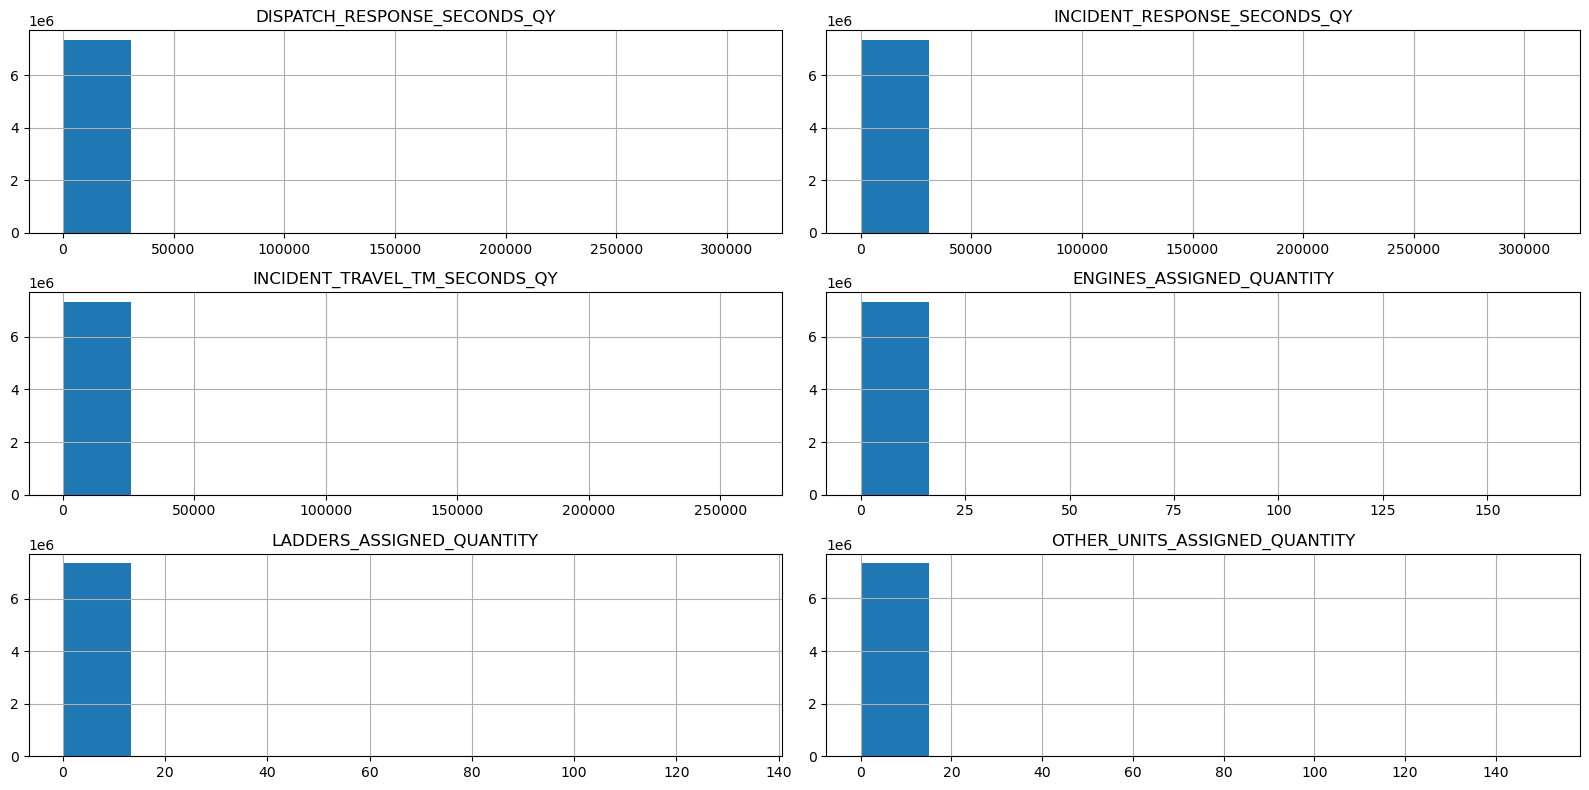

In [68]:
# plot histograms for numeric df with tight layout so they don't overlap
histograms = numeric_df2.hist(figsize=(16,8))
plt.tight_layout() 
plt.show()

In [69]:
# Check the max values of 'ENGINES_ASSIGNED_QUANTITY'
numeric_df2['ENGINES_ASSIGNED_QUANTITY'].max()

164

- The data is very right skewed due to outliers, I would need to examine the effects with and without scaling it in future when I model it.

- Below I have applied a logarithmic scale to see the histograms scaled

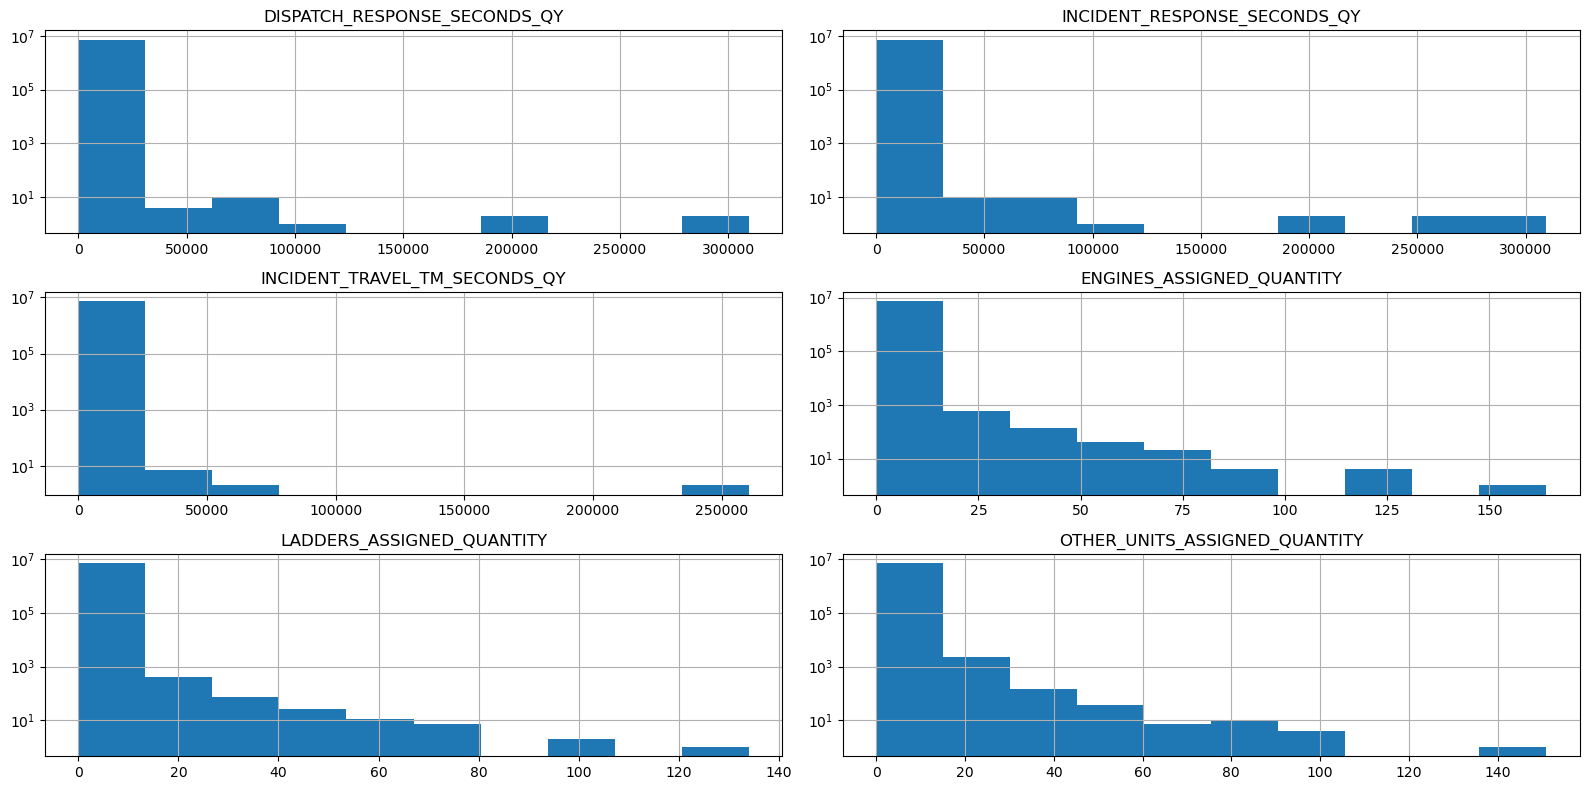

In [70]:
# plot histograms with log=True scale for numeric df with tight layout so they don't overlap 
histograms = numeric_df2.hist(figsize=(16,8), log=True)
plt.tight_layout() 
plt.show()

- On the most part the numerical data is very much skewed to the right

- The outliers on the right for all of these columns should be examined by the fire service, as they could be errors and are unlikely incidents. If they are not errors then perhaps they have somethong in common. Making another database for outliers alone would be interesting to do in future.

#### Next I am going to look at categorical data.

In [71]:
# Create a categorical dataframe .select_dtypes('object')
categorical_df2 = df3.select_dtypes('object').copy()
categorical_df2.head()

,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,ALARM_SOURCE_DESCRIPTION_TX,ALARM_LEVEL_INDEX_DESCRIPTION,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC
0,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,Phone,Initial Alarm,First Alarm,Carbon Monoxide - Code 1 - Investigation,NonMedical Emergencies,N,Y
1,ARTHUR AVE & 183 ST,BRONX,10458.0,PD Link/Medical,DEFAULT RECORD,First Alarm,Medical MFA - PD Link,Medical MFAs,N,Y
2,TOMPKINS & PARK AVES,BROOKLYN,11206.0,PD Link/Medical,Initial Alarm,First Alarm,Medical - Assist Civilian,Medical Emergencies,N,Y
3,ASTORIA BLVD AND 2ND ST,QUEENS,11102.0,Phone,DEFAULT RECORD,First Alarm,Non-Medical MFA - Phone,NonMedical MFAs,N,Y
4,JACKSON & 42 RD,QUEENS,11101.0,Private Fire Alarm,Initial Alarm,First Alarm,Sprinkler System - Working on System,NonMedical Emergencies,N,Y


In [72]:
categorical_df2.shape

(7340207, 10)

There are 10 categorical columns. I am going to create subplots of some of the categorical columns. I picked some that I felt would give a good impression of the data to gain a better undrestanding of the data.

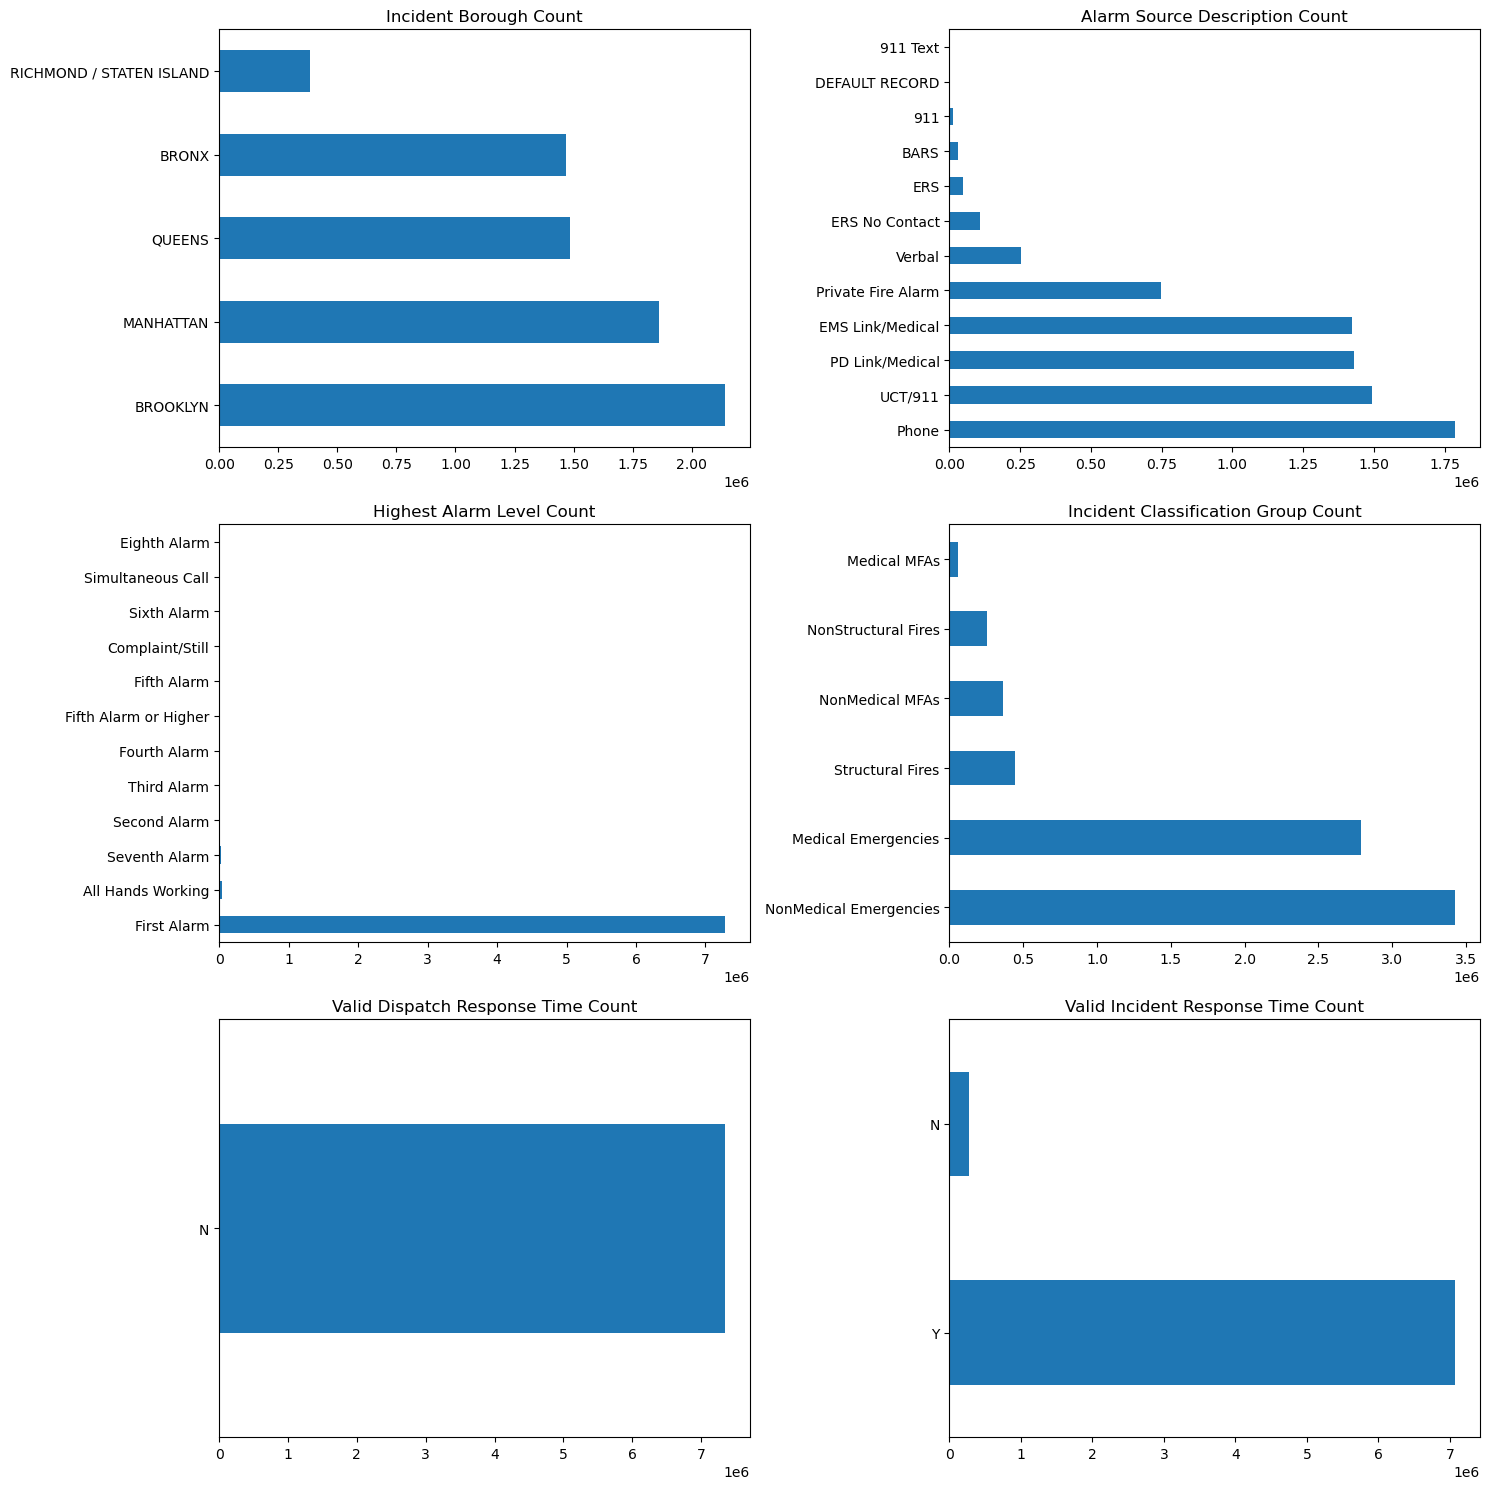

In [73]:
# create subplots with horizontal bar charts

plt.subplots(3, 2, figsize=(15,15))  # three rows, two columns for the subplots

plt.subplot(3, 2, 1)  
categorical_df2['INCIDENT_BOROUGH'].value_counts().plot(kind='barh')
plt.title('Incident Borough Count')

plt.subplot(3, 2, 2)  
categorical_df2['ALARM_SOURCE_DESCRIPTION_TX'].value_counts().plot(kind='barh')
plt.title('Alarm Source Description Count')

plt.subplot(3, 2, 3)  
categorical_df2['HIGHEST_ALARM_LEVEL'].value_counts().plot(kind='barh')
plt.title('Highest Alarm Level Count')

plt.subplot(3, 2, 4)  
categorical_df2['INCIDENT_CLASSIFICATION_GROUP'].value_counts().plot(kind='barh')
plt.title('Incident Classification Group Count')

plt.subplot(3, 2, 5)  
categorical_df2['VALID_DISPATCH_RSPNS_TIME_INDC'].value_counts().plot(kind='barh')
plt.title('Valid Dispatch Response Time Count')

plt.subplot(3, 2, 6)  
categorical_df2['VALID_INCIDENT_RSPNS_TIME_INDC'].value_counts().plot(kind='barh')
plt.title('Valid Incident Response Time Count')


plt.tight_layout()  # makes sure there is no overlap in plots

plt.show() # show subplots

From the above visualisations we can see that

- The `VALID_DISPATCH_RSPNS_TIME_INDC` only has one factor: *No*. None of the dispatch response times were validated; perhaps the fire service should consider scrapping it or enforcing it strongly.

- In comparison the `VALID_INCIDENT_RSPNS_TIME_INDC` is almost always recorded. Maybe the fire service can shed light on the difference/ease of validating between the former and the latter.

- *Non Medical* followed by *Medical* form the bulk of the `INCIDENT_CLASSIFICATION_GROUP` count, whilst actual structural fires and non structrural fires have a signifgicant enough amount but are relatively small compared to the former two.

- The first alarm type is overwhelming in count compared to the remaining in alarm types in `HIGHEST_ALARM_LEVEL` which matches the zero travel alarm type previously seen.

- The phone and uct/911 (unified call taking system), together form the bulk of `ALARM_SOURCE_DESCRIPTION_TX`. If the phone is strongly correlated to travel time I would reccomend increasing the support they receive.

- The `INCIDENT_BOROUGH` shows that Brooklyn receives the most incidents whilst Richmond/ Staten Island receives the least incidents- this is in line with their population sizes (Brooklyn has the largest population whilst Richmond/ Staten Island has the smallest population) so it is not surprising.

Please note the 'le6' at the bottom of each graph means 1* 10 to the power of 6, so 1 with 1e6 applied is 1,000,000. Python is simply using this format to represent the numbers in a readable format.

## 9. Save dataframe into csv 
I am going to save this preprocessed data into a CSV file, as re running the kernel will grow laborious. I am also going to save the zero-travel dataset into a CSV file in an attempt to use in tableau for mapping purposes.

In [74]:
# save this cleaned data to csv
df3.to_csv('capstone_eda.csv')

In [75]:
# create a copy of the zero_travel dataframe
zero_travel2 = zero_travel.copy()
zero_travel2

,STARFIRE_INCIDENT_ID,INCIDENT_TRAVEL_TM_SECONDS_QY,HIGHEST_ALARM_LEVEL,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE
11,5.001042e+14,0,First Alarm,"ON HOUSTON ST, 150 FT EAST OF AVE D",MANHATTAN,10009.0
16,5.001148e+14,0,First Alarm,10 AVE & 48 ST,BROOKLYN,11219.0
53,5.001280e+14,0,First Alarm,145 RD & SPRINGFIELD BLVD,QUEENS,NaN
57,5.001312e+14,0,First Alarm,QUEENS BLVD OPP. JACOBUS ST,QUEENS,11373.0
67,5.001132e+14,0,First Alarm,3 AVE & CARROLL ST,BROOKLYN,11215.0
...,...,...,...,...,...,...
8538417,2.112530e+15,0,First Alarm,OCEAN AVE & AVENUE J,BROOKLYN,11230.0
8538421,2.112520e+15,0,First Alarm,ATLANTIC AVE & EASTERN PWAY,BROOKLYN,11233.0
8538423,2.112520e+15,0,First Alarm,FORT WASHINGTON AVE & 172 ST,MANHATTAN,NaN
8538428,2.112510e+15,0,First Alarm,NEW HAVEN AVE & BEACH 13 ST,QUEENS,11691.0


In [76]:
# drop the 'INCIDENT_TRAVEL_TM_SECONDS_QY' column as it is 0 only
zero_travel2.drop(columns=['INCIDENT_TRAVEL_TM_SECONDS_QY'] ,inplace=True)

In [77]:
# now take a 10% sample of this dataframe
zero_travel_sample = zero_travel2.sample(frac=.1, replace=True, random_state=1)

In [78]:
# save the zero travel sample dataframe to csv file
zero_travel_sample.to_csv('zero_travl_sample.csv')

I saved the zero_travel_sample dataframe to a CSV file, in an attempt to explore and map the data in Tableau. Unfortunately, however, there was not enough data given for Tableau to plot the locations onto a map of New York.